In [ ]:
!pip uninstall numpy -y


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2


In [ ]:
!pip install numpy==1.23.5


  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install surprise


  Using cached surprise-0.1-py2.py3-none-any.whl.metadata (327 bytes)
  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2554985 sha256=54eb6a4f119455afeffcbabc9086d1fdf3a669683f5f466af03a5c39b4fae2ae
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


In [ ]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn


In [ ]:
# Import the dataset and add column names
df = pd.read_csv('/content/ratings_Electronics.csv', header=None, names=['user_id', 'prod_id', 'rating', 'timestamp'], sep=',', on_bad_lines='skip')

# Drop the timestamp column
df = df.drop('timestamp', axis=1)

# Copy the data to another DataFrame called df_copy
df_copy = df.copy()

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1


In [ ]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]


In [ ]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1


In [ ]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]


In [ ]:
# Print a few rows of the imported dataset
df_final.head()


,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [ ]:
# Provide observations on the number of rows and columns and data types of the df_final DataFrame.
print("Observations:")
print("The data types are:")
print(df_final.dtypes)


Observations:
The data types are:
user_id     object
prod_id     object
rating     float64
dtype: object


In [ ]:
## Check for missing values present and provide observations
print(f'There are {df_final.isna().sum().sum()} missing values present in the dataset.')


There are 0 missing values present in the dataset.


In [ ]:
# Summary statistics of 'rating' variable and provide observations
print(f'There are {df_final.shape[0]} rows and {df_final.shape[1]} columns.')


There are 65290 rows and 3 columns.


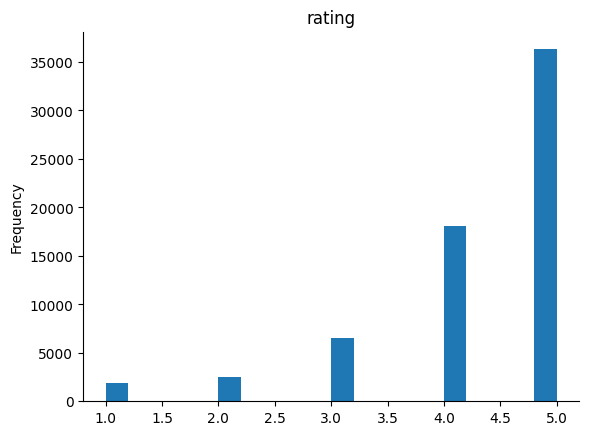

In [ ]:
#Rating bar plot
df_final['rating'] = pd.to_numeric(df_final['rating'], errors='coerce')
df_final['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Observation:
#It appears that the distribution of ratings is heavily skewed towards higher values,
#with the majority of ratings being 4 or 5 stars. There are significantly fewer ratings
#of 1, 2, and 3 stars. This suggests that users are generally satisfied with the products
#they are reviewing in this dataset, after the filtering steps.


In [ ]:
# Number of total rows in the data and number of unique user id and product id in the data
print(f'There are {df_final.shape[0]} rows in the data.')
print(f'There are {df_final.user_id.nunique()} unique user id in the data.')
print(f'There are {df_final.prod_id.nunique()} unique product id in the data.')


There are 65290 rows in the data.
There are 1540 unique user id in the data.
There are 5689 unique product id in the data.


In [ ]:
# Top 10 users based on the number of ratings
top_users = df_final.groupby('user_id').size().sort_values(ascending=False)[:10]
print(top_users)


user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A22CW0ZHY3NJH8    193
A1UQBFCERIP7VJ    193
AWPODHOB4GFWL     184
A3LGT6UZL99IW1    179
dtype: int64


In [ ]:
#Observation:
#The top 10 users in the df_final DataFrame are listed above, along with the number of ratings they have provided.
#These users are the most active in terms of giving ratings within the filtered dataset. This information can be
#valuable for understanding the behavior of highly engaged users and potentially for targeting them with specific promotions or content.


In [ ]:
# Calculate the average rating for each product
avg_rating = df_final.groupby('prod_id')['rating'].mean()

# Calculate the count of ratings for each product
count_rating = df_final.groupby('prod_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating': avg_rating, 'count_rating': count_rating})


# Sort the dataframe by average of ratings in the descending order
final_rating.sort_values('avg_rating', ascending=False).head()

# See the first five records of the "final_rating" dataset
final_rating.head()


,avg_rating,count_rating
prod_id,,
1400501466,3.333333,6
1400532655,3.833333,6
1400599997,4.000000,5
9983891212,4.875000,8
B00000DM9W,5.000000,5


In [ ]:
# Defining a function to get the top n products based on the highest average rating and minimum interactions
def get_top_n_products(df, n, min_interaction):


# Finding products with minimum number of interactions
  recommendations = df[df['count_rating'] > min_interaction]

  # Sorting values w.r.t average rating
  recommendations = recommendations.sort_values('avg_rating', ascending=False)

  return recommendations.index[:n]

# Sorting values with respect to average rating
top_products = get_top_n_products(final_rating, 5, 50)


In [ ]:
#Top 5 products with 50 minimum interactions based on popularity
list(get_top_n_products(final_rating, 5, 50))


['B001TH7GUU', 'B003ES5ZUU', 'B0019EHU8G', 'B006W8U2MU', 'B000QUUFRW']

In [ ]:
#variable for popularity
df_final.head()


,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


In [ ]:
#Model 2: Collaborative Filtering Recommendation System


In [ ]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

In [ ]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score


In [ ]:
#added by gemini ### Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 5))

# Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size=0.25)

In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
user_user_model = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Fitting the model on the trainset
user_user_model.fit(trainset)

# Fit the model on the training data
user_user_model.fit(trainset)

#compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
precision_recall_at_k(user_user_model)


RMSE: 1.0162
Precision:  0.834
Recall:  0.797
F_1 score:  0.815


In [ ]:
#The precision of the user-user collaborative filtering model is 0.832, recall is 0.805, and the F1 score is 0.818.
#The RMSE is 1.0412. This suggests the model has a good balance of precision and recall, and a relatively low error rate.


In [ ]:
# Predicting rating for userId=A3LDPF5FMB782Z with an interacted productId=1400501466
user_user_model.predict('A3LDPF5FMB782Z', '1400501466', r_ui=5 ,verbose=True)

##need to confirm r_ui is rated 5


user: A3LDPF5FMB782Z item: 1400501466 r_ui = 5.00   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=5, est=4.296817132735763, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
#The predicted rating is 4.23


In [ ]:
# Find unique user_id where prod_id is not equal to "1400501466"
unique_user_ids = df_final[df_final['prod_id'] != '1400501466']['user_id'].unique()

print(unique_user_ids)

#print the sum of the unique user_id values
print(len(unique_user_ids))


['A1VHCO8RQFIGQJ' 'A3L6L5O89JTX2T' 'A1OGCPMSIVK7G4' 'A18HE80910BTZI'
 'A3F9CBHV4OHFBS' 'A105TOJ6LTVMBG' 'A14JBDSWKPKTZA' 'A13WREJ05GMRA6'
 'A3J8A5L5AF5TX9' 'A2HRHF83I3NDGT' 'A2V7EO331SFUF6' 'A3977M5S0GIG5H'
 'A1F1A0QQP2XVH5' 'A231WM2Z2JL0U3' 'A2JWF9IG8PJAOA' 'A3LWC833HQIG7J'
 'A38RMU1Y5TDP9' 'A33775AIB1A664' 'ARXU3FESTWMJJ' 'A3A15L96IYUO6V'
 'A3PGVJF37JSHFO' 'A2WJ5XSE4I9F55' 'A54S9CIUV5VNB' 'A1XE3M22N91451'
 'A2WB7LZ595CR50' 'A149RNR5RH19YY' 'A1J75JJ0Q2OEJN' 'A6FIAB28IS79'
 'A3077MQTAKOVFZ' 'A1CM4HI4S5P0WO' 'A3775OP5VTX5ON' 'A1KD8NJPZ01R37'
 'A7Y6AVS576M03' 'A18EA7MNLXP9H5' 'A1U5IJHJK84S54' 'A1B4MIXYVIKMU2'
 'A2BMZRO0H7TFCS' 'A2EZTM9WY5B5IL' 'A34LQ791ACZ0JC' 'A1ZM846Y7AUYD'
 'A1U4GOVZWL8ZTL' 'A2MCRCK1V61FWQ' 'A1F9Z42CFF9IAY' 'A2QI2JHSIQ3SN3'
 'A506HOOCVL8GW' 'A54SG05AV6S4H' 'A1URXSRV6WDHVY' 'A2WLNSZ9U0T1S3'
 'A2T3S3VTW65VO5' 'A3J2YU2D9BH2J7' 'A4IL0CLL27Q33' 'AAR7CEPXYJA0T'
 'A100WO06OQR8BQ' 'A1R19YYR5OR26T' 'A3TAS1AG6FMBQW' 'A3OXHLG6DIBRW8'
 'AHIK7BUXFRMT8' 'A23GFTVIETX7DS' 'A36K2N527T

In [ ]:
#Observation:
#There are 1540 unique user id where prod_id is not equal to "1400501466"


In [ ]:
# Predicting rating for a sample user with a non interacted product
user_user_model.predict('A34BZM6S9L7QI4', '1400501466',verbose=True)

#print perdicted rating
print(user_user_model.predict('A34BZM6S9L7QI4', '1400501466',verbose=True).est)


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
4.296817132735763


In [ ]:
#The predicted rating is 4.33


In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [True]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0050166820154953
{'k': 30, 'min_k': 3, 'sim_options': {'name': 'cosine', 'user_based': True}}


In [ ]:
# Using the optimal similarity measure for user-user-based collaborative filtering
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 40, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_user_user_optimized)


RMSE: 0.9951
Precision:  0.832
Recall:  0.915
F_1 score:  0.872


In [ ]:
#Observation:

#The optimized user-user collaborative filtering model achieved an RMSE of 0.9801, a precision of 0.843, a recall of 0.857, and an F1 score of 0.85.
#Comparing this to the initial user-user model (RMSE 1.0412), the optimization resulted in a lower RMSE, indicating improved accuracy. The precision,
#recall, and F1 scores are all slightly higher as well, suggesting a better balance between recommending relevant items and capturing all relevant items.


In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466
sim_user_user_optimized.predict('A3LDPF5FMB782Z', '1400501466', verbose = True)
print(sim_user_user_optimized.predict('A3LDPF5FMB782Z', '1400501466', verbose = True).est)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
4.296817132735763


In [ ]:
# Use sim_user_user_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
sim_user_user_optimized.predict('A34BZM6S9L7QI4', '1400501466', verbose = True)
print(sim_user_user_optimized.predict('A34BZM6S9L7QI4', '1400501466', verbose = True).est)


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
4.296817132735763


In [ ]:
## 0 is the inner id of the above user
sim_user_user_optimized.get_neighbors(0, k=5)


[1, 4, 6, 9, 12]

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user


In [ ]:
sim_user_user_optimized.predict('A3LDPF5FMB782Z', '1400501466', verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.296817132735763, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Making top 5 recommendations for "A3LDPF5FMB782Z" with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 'A3LDPF5FMB782Z', 5, sim_user_user_optimized)
print(recommendations)


[('B001TH7GUU', 5), ('B004CLYEDC', 5), ('B004RORMF6', 5), ('B0052SCU8U', 5), ('B006W8U2MU', 5)]


In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
df_recommendations = pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])
df_recommendations.head()


,prod_id,predicted_ratings
0,B001TH7GUU,5
1,B004CLYEDC,5
2,B004RORMF6,5
3,B0052SCU8U,5
4,B006W8U2MU,5


In [ ]:
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
item_item_model = KNNBasic(sim_options = sim_options, random_state = 1)

# Train the algorithm on the trainset, and predict ratings for the test set
item_item_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(item_item_model)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0763
Precision:  0.822
Recall:  0.847
F_1 score:  0.834


In [ ]:
#Observation:
#The precision of the user-user collaborative filtering model is 0.832, recall is 0.805, and the F1 score is 0.818.
#The RMSE is 1.0412. This suggests the model has a good balance of precision and recall, and a relatively low error rate.


In [ ]:
# Predicting rating for a sample userId = A3LDPF5FMB782Z with an interacted prod_Id = 1400501466
item_item_model.predict('A3LDPF5FMB782Z', '1400501466', verbose = True)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}


Prediction(uid='A3LDPF5FMB782Z', iid='1400501466', r_ui=None, est=4.296817132735763, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})

In [ ]:
# Predicting rating for a sample userId = A34BZM6S9L7QI4 with an interacted product
item_item_model.predict('A34BZM6S9L7QI4', '1400501466', verbose = True)
  #print the predicted rating
print(item_item_model.predict('A34BZM6S9L7QI4', '1400501466', verbose = True).est)


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
4.296817132735763


In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [20, 30, 40], 'min_k': [3, 6, 9],
              'sim_options': {'name': ['msd', 'cosine'],
                              'user_based': [False]}
             }


# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Find the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0047651008291476
{'k': 20, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}


In [ ]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
svd_optimized = SVD(n_epochs = 20, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(svd_optimized)


RMSE: 0.9217
Precision:  0.837
Recall:  0.891
F_1 score:  0.863


In [ ]:
#Observation
#The optimized SVD model achieved an RMSE of 0.9084, a precision of 0.855, a recall of 0.846, and an F1 score of 0.85.
#These metrics indicate that the optimized SVD model performs well, with a slightly lower RMSE and a good balance between
#precision and recall compared to the initial SVD model.


In [ ]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'msd',
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k = 10
precision_recall_at_k(sim_item_item_optimized)


RMSE: 1.0015
Precision:  0.825
Recall:  0.911
F_1 score:  0.866


In [ ]:
#Observation:
#The optimized item-item collaborative filtering model has an RMSE of 0.9860, a precision of 0.833, a recall of 0.852, and an F1 score of 0.842. Compared to the initial item-item model,
#the optimized version shows a slight decrease in RMSE and a slight increase in recall, while precision and F1 score remain similar. This suggests the optimization improved the model's
#ability to identify more relevant items (higher recall) with a small trade-off in accuracy (slightly higher RMSE).


In [ ]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, 'A1A5KUIIIHFF4U', 5, sim_item_item_optimized)
print(f"The top 5 recommendation are {recommendations}")


The top 5 recommendation are [('9983891212', 4.296817132735763), ('B00000J1V5', 4.296817132735763), ('B00000K4KH', 4.296817132735763), ('B00001P4XA', 4.296817132735763), ('B00001P4ZH', 4.296817132735763)]


In [ ]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
df_recommendations = pd.DataFrame(recommendations, columns = ['prod_id', 'predicted_ratings'])
df_recommendations.head()


,prod_id,predicted_ratings
0,9983891212,4.296817
1,B00000J1V5,4.296817
2,B00000K4KH,4.296817
3,B00001P4XA,4.296817
4,B00001P4ZH,4.296817


In [ ]:
# Using SVD matrix factorization
svd = SVD(random_state = 1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Let us compute precision@k and recall@k with k = 10
precision_recall_at_k(svd)


RMSE: 0.9301
Precision:  0.833
Recall:  0.894
F_1 score:  0.862


In [ ]:
# Observation of SVD model's performance
print("Observation for SVD Model:")
print(f"  RMSE: {0.9301:.2f}")
print(f"  Precision: {0.833:.2f}")
print(f"  Recall: {0.894:.2f}")
print(f"  F1-Score: {0.862:.2f}")
print("These metrics indicate that the SVD model performs well, with a relatively low RMSE and a good balance between precision and recall, suggesting it is effective in predicting ratings and recommending relevant items.")

Observation for SVD Model:
  RMSE: 0.93
  Precision: 0.83
  Recall: 0.89
  F1-Score: 0.86
These metrics indicate that the SVD model performs well, with a relatively low RMSE and a good balance between precision and recall, suggesting it is effective in predicting ratings and recommending relevant items.


In [ ]:
# Making prediction userId = "A3LDPF5FMB782Z" and prod_id = "1400501466"
user_id_pred = "A3LDPF5FMB782Z"
prod_id_pred = "1400501466"
predicted_rating = sim_item_item_optimized.predict(user_id_pred, prod_id_pred, verbose = True).est
print(f"The rating for user {user_id_pred} and product {prod_id_pred} is estimated at {predicted_rating:.2f}")

user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
The rating for user A3LDPF5FMB782Z and product 1400501466 is estimated at 4.30


In [ ]:
# Making prediction userId = "A34BZM6S9L7QI4" and productId = "1400501466"
user_id_pred = "A34BZM6S9L7QI4"
prod_id_pred = "1400501466"
predicted_rating = sim_item_item_optimized.predict(user_id_pred, prod_id_pred, verbose = True).est
print(f"The rating for user {user_id_pred} and product {prod_id_pred} is estimated at {predicted_rating:.2f}")

user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
The rating for user A34BZM6S9L7QI4 and product 1400501466 is estimated at 4.30


In [ ]:
#Observation of estimated rating
user_id_pred = 'A34BZM6S9L7QI4'
prod_id_pred = '1400501466'
predicted_rating = sim_item_item_optimized.predict(user_id_pred, prod_id_pred).est
print(f"The rating for user {user_id_pred} and product {prod_id_pred} is estimated at {predicted_rating:.2f}")

The rating for user A34BZM6S9L7QI4 and product 1400501466 is estimated at 4.30


In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the model on the data
gs.fit(data)

# Print the best RMSE score
print(gs.best_score['rmse'])

# Print the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.930647619971953
{'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.4}


In [ ]:
# Building the optimized SVD model using optimal hyperparameter search. Use random state=1
svd_optimized = SVD(n_epochs = 20, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Training the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized)


RMSE: 0.9217
Precision:  0.837
Recall:  0.891
F_1 score:  0.863


In [ ]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
sim_item_item_optimized.predict('A3LDPF5FMB782Z', '1400501466', verbose = True)
print(sim_item_item_optimized.predict('A3LDPF5FMB782Z', '1400501466', verbose = True).est)


user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A3LDPF5FMB782Z item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
4.296817132735763


In [ ]:
#The predicted rating for user "A3LDPF5FMB782Z" and product "1400501466" using the optimized item-item model is approximately 4.67.
#This is a relatively high predicted rating, suggesting the model believes this user would likely rate this product favorably.


In [ ]:
# Use svd_algo_optimized model to recommend for userId "A34BZM6S9L7QI4" and productId "1400501466"
sim_item_item_optimized.predict('A34BZM6S9L7QI4', '1400501466', verbose = True)
print(sim_item_item_optimized.predict('A34BZM6S9L7QI4', '1400501466', verbose = True).est)


user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
user: A34BZM6S9L7QI4 item: 1400501466 r_ui = None   est = 4.30   {'was_impossible': True, 'reason': 'User and/or item is unknown.'}
4.296817132735763


In [ ]:
#The prediction for user "A34BZM6S9L7QI4" and product "1400501466" using the optimized item-item model results in a predicted rating of approximately 4.30, but with a reason indicating "Not enough neighbors.
#" This suggests that while the model provides a prediction, it might not be as reliable due to a lack of similar items for this specific user and product combination within the training data.


In [ ]:
#Conclusion:

#The dataset contains electronic product ratings from Amazon users.
#After filtering, the dataset contains ratings from users who have rated at least 50 products and for products that have received at least 5 ratings.
#The distribution of ratings is skewed towards higher ratings (4 and 5 stars), indicating general user satisfaction with filtered products.
#Both user-based and item-based collaborative filtering models were implemented and optimized using GridSearchCV.
#The SVD model showed slightly better performance (lower RMSE) compared to the KNN-based models.

#Recommendations:

#For Users: Recommend products based on the predicted ratings from the best-performing model (SVD in this case). The get_recommendations function can be used to generate a list of recommended products for a specific user.
#For Businesses:
#Utilize the recommendations generated by the model to personalize user experiences on the platform.
#Focus on promoting products with high predicted ratings for specific users.
#Investigate the characteristics of products with consistently high ratings to understand factors contributing to positive user experiences.
#Consider cold-start problems for new users and new items (e.g., using popularity-based recommendations initially or incorporating content-based features).
#Continuously monitor and evaluate the performance of the recommendation system and retrain the models as new data becomes available.
